In [51]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14)

In [52]:
name = '^NSEI'
df = yfinance.download(name , start="2021-06-01",end="2021-08-01")


[*********************100%***********************]  1 of 1 completed


In [53]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,15629.650391,15660.750000,15528.299805,15574.849609,15574.849609,409600
2021-06-02,15520.349609,15597.450195,15459.849609,15576.200195,15576.200195,428600
2021-06-03,15655.549805,15705.099609,15611.000000,15690.349609,15690.349609,410200
2021-06-04,15712.500000,15733.599609,15622.349609,15670.250000,15670.250000,414200
2021-06-07,15725.099609,15773.450195,15678.099609,15751.650391,15751.650391,394000


In [54]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Adj Close']]

In [55]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance

In [56]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))

In [57]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


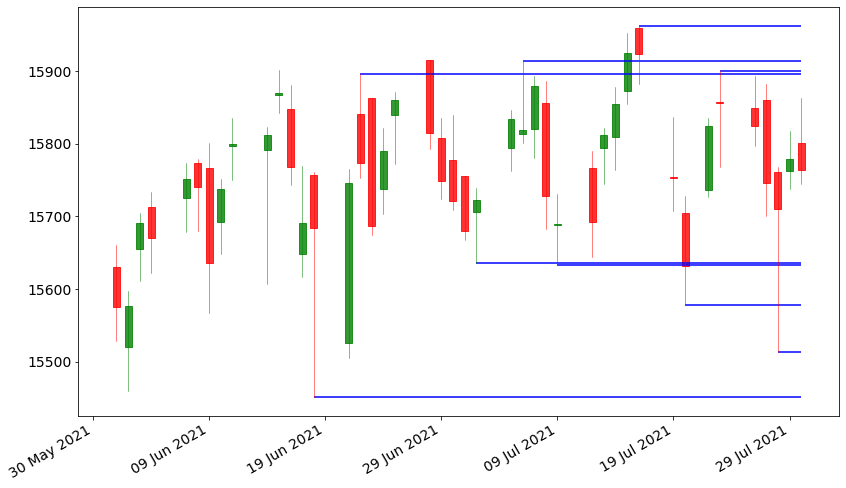

In [58]:
plot_all()


In [59]:
s =  np.mean(df['High'] - df['Low'])


In [60]:
def isFarFromLevel(l):
  return np.sum([abs(l-x) < s  for x in levels]) == 0

In [61]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

  elif isResistance(df,i):
    l = df['High'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

In [62]:
levels

[(13, 15450.900390625), (15, 15895.75), (23, 15635.9501953125)]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


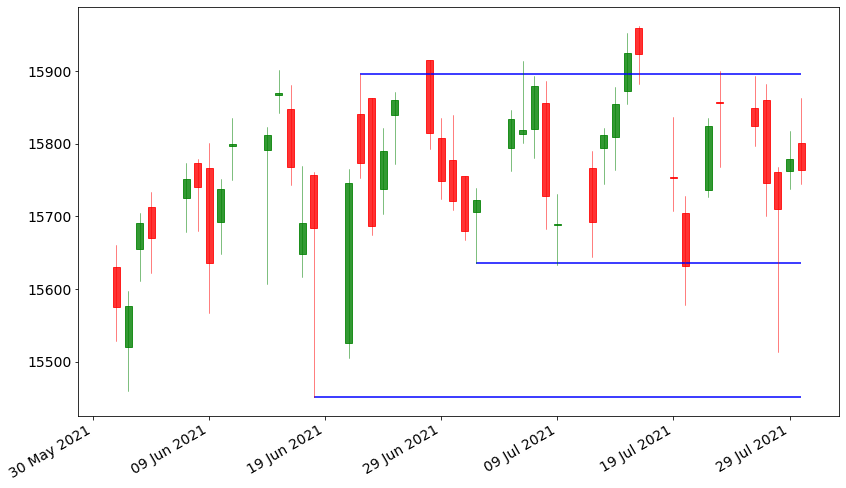

In [63]:
plot_all()
